In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the 'avocado.csv' with pandas. Make sure a new unnecessary column is not generated.

In [6]:
df_avocado = pd.read_csv("avocado.csv", index_col=0)
df_avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Explore the dataset, pay attention to redundancies, note the categorical (non-numeric) variables.

In [7]:
df_avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
df_avocado.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
diffs = df_avocado['Total Bags'] - (df_avocado['Small Bags'] + df_avocado['Large Bags'] + df_avocado['XLarge Bags'])

In [10]:
diffs.abs().sum()

75.00000020441107

In [11]:
print( sum(diffs.abs()!=0), sum(diffs.abs() >= 0.001), sum(diffs.abs() > 1))
#in general total bags should represent the sum with small deviations

4036 75 0


#### Drop the unnecessary columns, if any. 

In [12]:
df_avocado.drop(columns='Total Bags', inplace=True)
df_avocado

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.00,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.00,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.00,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.00,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.00,conventional,2015,Albany
5,1.26,55979.78,1184.27,48067.99,43.61,6556.47,127.44,0.00,conventional,2015,Albany
6,0.99,83453.76,1368.92,73672.72,93.26,8196.81,122.05,0.00,conventional,2015,Albany
7,0.98,109428.33,703.75,101815.36,80.00,6266.85,562.37,0.00,conventional,2015,Albany
8,1.02,99811.42,1022.15,87315.57,85.34,11104.53,283.83,0.00,conventional,2015,Albany
9,1.07,74338.76,842.40,64757.44,113.00,8061.47,564.45,0.00,conventional,2015,Albany


#### Choose the 'AveragePrice' column as your target (y) variable.

In [13]:
X = df_avocado.loc[:, df_avocado.columns.difference(['AveragePrice'])]
y = df_avocado['AveragePrice']

#### Plot the relationship of each of the numerical features with the target variable

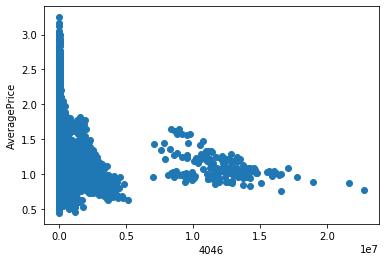

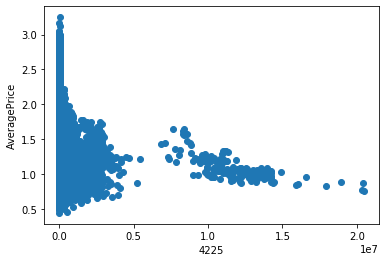

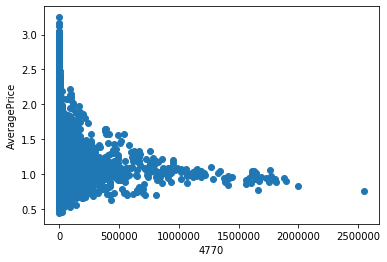

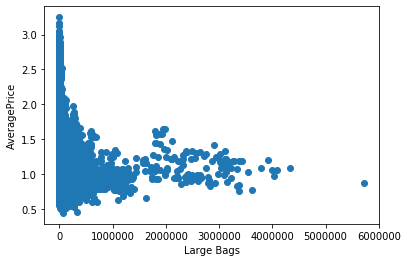

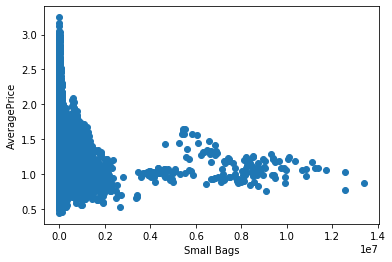

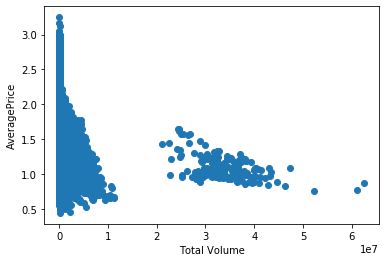

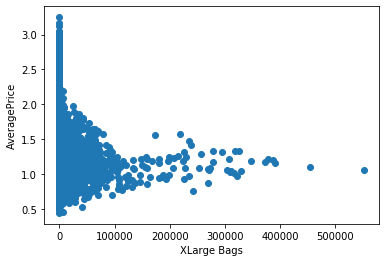

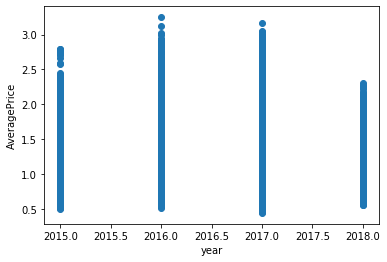

In [14]:
for numerical_column in X.select_dtypes([np.number]).columns:
    plt.scatter(X[numerical_column], y)
    plt.xlabel(numerical_column)
    plt.ylabel("AveragePrice")
    plt.show()

#### Convert categorical variables to numeric. 
#### Note: variables with little amount of unique values are better to be considered categoricals.

In [16]:
pd.get_dummies(X['year'])

,2015,2016,2017,2018
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [17]:
# making year into one hot vector
unique_years= np.unique(X['year'])
for year in unique_years:
    X['year_' + str(year)] = 0
    X.loc[X['year'] == year, 'year_' + str(year)] = 1
X.drop(columns='year', inplace=True)

In [18]:
# small, medium, large, XL
# small < medium < big
# 0, 1, 2
# 1, 2, 3

# 2015, 2016, 2017, 2018
# 0, 1, 2, 3


In [20]:
df_avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [21]:
df_avocado['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [22]:
# making region and type into numbers
categorical_columns = ['region', 'type']
for feature in categorical_columns:
    X.loc[:, feature] = X.loc[:, feature].astype('category').cat.codes

In [25]:
X.head()

,4046,4225,4770,Large Bags,Small Bags,Total Volume,XLarge Bags,region,type,year_2015,year_2016,year_2017,year_2018
0,1036.74,54454.85,48.16,93.25,8603.62,64236.62,0.0,0,0,1,0,0,0
1,674.28,44638.81,58.33,97.49,9408.07,54876.98,0.0,0,0,1,0,0,0
2,794.70,109149.67,130.50,103.14,8042.21,118220.22,0.0,0,0,1,0,0,0
3,1132.00,71976.41,72.58,133.76,5677.40,78992.15,0.0,0,0,1,0,0,0
4,941.48,43838.39,75.78,197.69,5986.26,51039.60,0.0,0,0,1,0,0,0


#### Divide data into Train and Test sets with the ratio 80:20.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14599, 13), (3650, 13), (14599,), (3650,))

#### Train linear Regression model using the training set

In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train.to_numpy(), y_train.to_numpy())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Calculate the mean squared error for the test set

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg.predict(X_test.to_numpy()), y_test.to_numpy())

0.09201747355914679

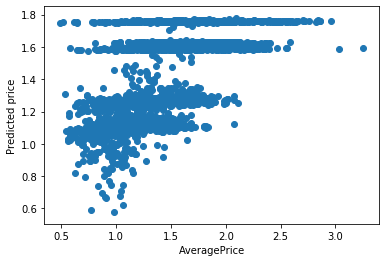

In [29]:
plt.scatter(y_test.to_numpy(), reg.predict(X_test.to_numpy()))
plt.xlabel('AveragePrice')
plt.ylabel('Predicted price')
# plt.xlim(0,4)
# plt.ylim(0,4)
plt.show()

---

#### Implement the following functions: mean_squared_error, mean_absolute_error, r2_score.
#### Each of them should have 2 vector arguments and return the appropriate score.

In [30]:
def imp_mean_sqaured_error(y_test, y_pred):
    return np.sum((y_pred - y_test)**2) / len(y_pred)

def imp_mean_absolute_error(y_test, y_pred):
    return np.sum(np.abs(y_pred - y_test)) / len(y_pred)

# total sum of squares
def RSS(y_test, y_pred):
    return np.sum((y_test - y_pred)**2)

# total sum of squares
def TSS(y_test):
    # return np.sum((y_test - y_test.mean())**2)
    return RSS(y_test, y_test.mean())

def imp_r2_score(y_test, y_pred):
    return 1 - (RSS(y_test, y_pred) / TSS(y_test))

#### Compare the resulting scores of your functions and scores of corresponding sklearn functions for the test set. They should be the same.

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = reg.predict(X_test.to_numpy())

print("mean_squared_error", mean_squared_error(y_test, y_pred))
print("implemented mean_squared_error", imp_mean_sqaured_error(y_test, y_pred), end='\n\n')
print("mean_absolute_error", mean_absolute_error(y_test, y_pred))
print("implemented mean_absolute_error", imp_mean_absolute_error(y_test, y_pred), end='\n\n')
print("r2_score", r2_score(y_test, y_pred))
print("implemented r2_score", imp_r2_score(y_test, y_pred))

# they are the same.

mean_squared_error 0.09201747355914679
implemented mean_squared_error 0.09201747355914679

mean_absolute_error 0.23224429967901497
implemented mean_absolute_error 0.23224429967901497

r2_score 0.4272857499460678
implemented r2_score 0.42728574994606794


---
### Optional tasks 

#### Choose 5 most relevant features from dataset with 'Forward Selection' (find in your slides).

In [32]:
from sklearn.linear_model import LinearRegression

best_selected_features = []
number_of_best_features = 5
rss_scores = {}

for i in range(number_of_best_features):
    
    least_rss_score = np.inf
    least_rss_feature = None
    
    for feature in X.columns.difference(best_selected_features): # don't consider already selected features
        lin_reg = LinearRegression()
        using_featires = best_selected_features + [feature]

        lin_reg.fit(X_train[using_featires].values, y_train.to_numpy())

        pred = lin_reg.predict(X_test[using_featires].values)
        
        pred_rss = RSS(pred, y_test.to_numpy())
        
        if least_rss_score > pred_rss:
            least_rss_score = pred_rss
            least_rss_feature = feature

    best_selected_features.append(least_rss_feature)
    rss_scores[len(best_selected_features)] = least_rss_score

In [16]:
best_selected_features

[]

In [17]:
for i, score in rss_scores.items():
    print(f"Best RSS score with {i} features is {score}.")

#### Choose 5 most relevant features from dataset with 'Backward Selection' (find in your slides).

In [18]:
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


all_features = list(X.columns)
current_selected_features = all_features[:]
removed_features = []
number_of_best_features = 5
rss_scores = {}


def get_test_rss(features, X_train, y_train, X_test, y_test):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[features].values, y_train.to_numpy())
    predictions = lin_reg.predict(X_test[features].values) 
    return RSS(predictions, y_test.to_numpy())


while len(current_selected_features) != number_of_best_features:
    rss_scores[len(current_selected_features)] = get_test_rss(current_selected_features, X_train, y_train, X_test, y_test)
    X2 = sm.add_constant(X_train[current_selected_features].values)
    est_ = sm.OLS(y_train, X2)
    est2 = est_.fit()
    # print(est2.summary())
    p_values = est2.summary2().tables[1]['P>|t|'][1:]
    highest_p_feature = p_values.argmax()
    current_selected_features.pop(highest_p_feature)
    
rss_scores[len(current_selected_features)] = get_test_rss(current_selected_features, X_train, y_train, X_test, y_test)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

In [ ]:
for i, score in rss_scores.items():
    print(f"Best RSS score with {i} features is {score}.")

In [ ]:
current_selected_features

#### What are the features that are in both of them?

In [ ]:
set(best_selected_features).intersection(current_selected_features)

{'type', 'year_2016', 'year_2017'}